# Details covering Ch2, Ch3

## Main Addition: Full definitions of various language builder functions presented here

Some of the material in this module could be repetitious, but still good practice.

A video describing the use of this module is below. Following that, we present the top-level functions defined in this module. Then come the function definitions themselves, and finally some tests that drive the functions and illustrate their usage.

**Note**: Some of the contents of the video below may not correspond to the latest code in these notebooks. However the principles remain the same.

**Note**: All functions have good internal documentation; so for example, if you run "help(lstar)", it will fully describe the lstar function.

**Note**: The definition of nthnumeric has evolved (it now expects a list as its second argument).

## This video is the same as in 02_01_Language_Basics -- less than 18 mins, so plz watch to recap!

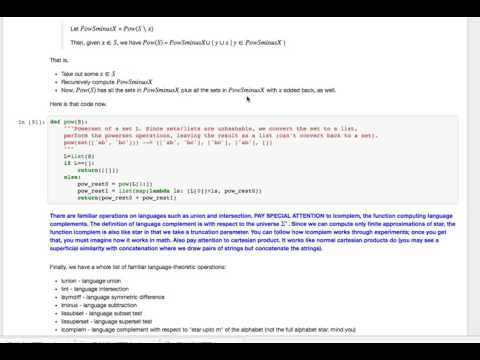

In [107]:
from IPython.display import YouTubeVideo
YouTubeVideo('TAEYvJn5eGc')

# Top-level functions in this module
 
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)


<span style="color:blue"> **Now we begin following along Chapter-2 of the book ** </span>

# Chapter-2: Alphabet and Languages

We begin our study of Alphabets and Languages. Please read the book. You *must* be doing two kinds of exercises:

* Do exercises on paper. That is the math you need from this course. There is no short-cut to it.

* Do the programming challenges (and play with the code) presented in this notebook (more exercises will be added). This programming part builds intuitions and helps knowledge stick. 

> Let us recall Prof. John McCarthy's quote

>> You do not understand anything unless you have studied it in multiple ways

It is to facilitate the "study in multiple ways" that the programming part is being given to you. It is the centerpiece of this work.

<span style="color:blue"> **Coding philosophy:** </span>

Clearly, the code in this book can be cast into an object-oriented style. We avoid doing so for these reasons:

* We want to keep the barrier to entry as low as possible. In fact, we are extremely parsimonious in our use of Python constructs. 

* We prefer to modularize each concept into specific sections where we treat the math and code as being almost at the same level. We also want these Jupyter notes to resemble Knuth's "literate programs". More reasons will be given in the Jupyter notes of Chapter 3.

<span style="color:blue"> **------** </span>

OK, now onto our subject matter!

## Alphabet and Language


An Alphabet is a *finite* set of finitary items, often called "symbols" - usually they are single characters, but they also could be finite strings or (in the case of GNFA) be themselves regular expressions.  Just think of an Alphabet $\Sigma$ to be a *finite* and *non-empty* set of symbols.

 
__Language__:


A language is a set of sequences (strings) of symbols. We define languages through Python code as follows. 

We are defining regular languages here. 

The simplest regular language is $\emptyset$, the empty language. This is like the "zero" of a language. Why so? We know that "0" is the annihilator for multiplication, i.e. 3 $\times$ 0 = 0. What is the multiplication operation for languages? It is concatenation!


* Notice that in almost all cases, languages are encoded using Python sets.

* Exceptions will be pointed out when they occur.

* Also, in almost all cases, languages are sets of strings.

__Zero Language__:

<span style="color:blue"> **We begin with the empty language (ZERO of a language). We use lphi() to refere to this language, as phi (Greek symbol) is used to denote the empty set. ** </span>

In [108]:
# The theory of languages : Primitive languages and language builders

def lphi():
    """In : None.
       Out: Zero language, i.e. set({}).
    """
    return set({})  # {} could be dict; so we put set(..)

In [109]:
lphi()

set()

__Unit Language__:

<span style="color:blue"> **Now we define the Unit language (ONE of a language) as well as concatenation. We use lunit() and lcat() to refer to these operations. ** </span>

Now let us define the Unit language ("1" for languages with respect to concatenation viewed as multiplication).

Let us also define language concatenation.

> $L1 \; L2 \;\; =\;\;  \{x y \; \mid \; x\in L1 \;\wedge\; y\in L2\}$

# Documentation Conventions

* Functions will have comment strings that start with """ and end with """
* In : will specify inputs separately, mentioning conceptual object and rep (Python data-type) 
* Out: will mention output, mentioning conceptual object and rep (Python data-type)
* Sometimes an example will follow
* Extremely simple helper functions won't have much of a doc (usually a one-liner)
* Example documentation:
```
  """In : L1 (language : a set),
          L2 (language : a set).
     Out: L1 concat L2 (language : a set).
     Example:
     L1 = {'ab', 'bc'} 
     L2 = {'11', 'ab', '22'} 
     lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
  """
```

In [110]:
def lunit():
    """In : None.
       Out: {""} (a language : a set).
    """
    return {""} # Set with epsilon

def lcat(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 concat L2 (language : a set).
       Example:
       L1 = {'ab', 'bc'} 
       L2 = {'11', 'ab', '22'} 
       lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
    """
    return {x+y for x in L1 for y in L2}

In [111]:
""

''

In [112]:
L1 = {"a" * n for n in range(0,3)}
L1

{'', 'a', 'aa'}

In [113]:
L2 = {"b" * m for m in range(0,2)}
L2

{'', 'b'}

In [114]:
lcat(L1,L2)

{'', 'a', 'aa', 'aab', 'ab', 'b'}

In [115]:
lcat(lunit(), L1)

{'', 'a', 'aa'}

In [116]:
x = {'','a'}
xcrossx = { (a,b) for a in x for b in x}
xcrossx

{('', ''), ('', 'a'), ('a', ''), ('a', 'a')}

In [117]:
len(lcat(x,x)) == len(xcrossx)

False

__Language Concatenation vs. Cartesian Product__:

<span style="color:blue"> **Notice the similarity with cartesian product. We draw a string x from L1 and string y from L2, but instead of pairing them, we concatenate them.** </span>

## Illustrations 

We now illustrate 

* the Zero language lphi(), 

* unit language lunit(), 

* and the lcat() operator

Let us take a simple example language L = $\{{\text 'a'}, {\text 'bc'}\}$ for illustration.

Recall that in Python, there are multiple ways to quote strings ('a', "a", or """a"""). The main idea is to support the nesting of quotes. So please don't be confused if we accidentally change our quoting method.

In [118]:
L = {'a','bc'}

print( "lcat(lphi(), L) = ",  lcat(lphi(), L) )
 
print( "lcat(lunit(), L) = ",  lcat(lunit(), L)  )

lcat(lphi(), L) =  set()
lcat(lunit(), L) =  {'a', 'bc'}



Let us define another language through set comprehension, and exercise many different applications of concatenation.


* Consider the language

 > M = $\{ 0^m 1^n \; \mid \; 0 \leq m,n \leq 3 \;\wedge\; m < n \}$

In [119]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print(M)

{'0111', '011', '11', '111', '1', '00111'}


In [120]:
print("lcat(L,M) = ", lcat(L,M))

lcat(L,M) =  {'bc11', 'bc0111', 'bc111', 'a0111', 'a00111', 'bc011', 'a11', 'bc1', 'bc00111', 'a011', 'a1', 'a111'}


In [121]:
print("lcat(M,lphi()) = ", lcat(M,lphi()))

lcat(M,lphi()) =  set()


In [122]:
print("lcat(M,lunit()) = ", lcat(M,lunit()))

lcat(M,lunit()) =  {'0111', '011', '11', '111', '1', '00111'}


<span style="color:green"> **Need to add a few exercises here. ** </span>

### Exponentiation as repeated concatenation

With concatenation and Unit under our belt, we can define exponentiation recursively. Exponentiation is repeated multiplication (which for us is concatenation).

> $L^n = L L^{n-1}$

> $L^0 = Unit$

We must have $L^0 = lunit()$; that is the only logical choice. 


__Question:__  If you defined $L^0 = lphi()$, then what happens?

The code below simulates the aforesaid recursion.

In [123]:
def lexp(L,n):
    """In : L (language : a set),
            n (exponent : a nat).
       Out: L^n (language : a set).
       Example:
       L = {'ab', 'bc'}
       n = 2
       lexp(A,2) -> {'abab', 'bcab', 'bcbc', 'abbc'}
    """
    return lunit() if n == 0 else lcat(L, lexp(L, n-1))


__Let us now test our lexp functionality__:



In [124]:
L = {'a','bc'}
lexp(L,2)

{'aa', 'abc', 'bca', 'bcbc'}

In [125]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print('M = ', M)
print('lexp(M,2) = ')
lexp(M,2)

M =  {'0111', '011', '11', '111', '1', '00111'}
lexp(M,2) = 


{'0011100111',
 '00111011',
 '001110111',
 '001111',
 '0011111',
 '00111111',
 '01100111',
 '011011',
 '0110111',
 '0111',
 '011100111',
 '0111011',
 '01110111',
 '01111',
 '011111',
 '0111111',
 '100111',
 '1011',
 '10111',
 '11',
 '1100111',
 '11011',
 '110111',
 '111',
 '11100111',
 '111011',
 '1110111',
 '1111',
 '11111',
 '111111'}

In [126]:
L = {'a','bc'}
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
lexp(lcat(L,M),1)

{'a00111',
 'a011',
 'a0111',
 'a1',
 'a11',
 'a111',
 'bc00111',
 'bc011',
 'bc0111',
 'bc1',
 'bc11',
 'bc111'}

<span style="color:green"> **Need to add a few exercises here. ** </span>

<span style="color:blue"> **Definition of the star of a language through function lstar. Since star produces an infinite set in almost all cases, we define a _truncated_ version of star. ** </span>


### With lexp under our belt, we can define lstar. We will define "star up to n" and then set n to infinity.

> $L^{*n} = L^n \; \cup \; L^{*(n-1)}$

> $L^{*0} = Unit$

And thus the classical $L^* = L^{*n}\;\; {\rm for}\;\; n=\infty$, which we won't bother to "run" in Python :-).  We will only run $L^{*n}$ in Python.

We also take care to test that lstar works correctly for lphi and Unit.


In [127]:
def lunion(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 union L2 (language : a set).
    """
    return L1 | L2

def lstar(L,n):
    """In : L (language : a set),
            n (bound for lstar : a nat). 
       Out: L*_n (language : a set)
    Example:
    L = {'ab','bc'}
    n = 2
    lstar(L,2) -> {'abab', 'bcbc', 'ab', 'abbc', '', 'bc', 'bcab'}
    """
    return lunit() if n == 0 else lunion(lexp(L,n), lstar(L,n-1))

In [128]:
L1 = {'a','bc'}
lstar(L1,2) 

{'', 'a', 'aa', 'abc', 'bc', 'bca', 'bcbc'}

In [129]:
L2 = {'ab','bc'}
lstar(L2,2) 

{'', 'ab', 'abab', 'abbc', 'bc', 'bcab', 'bcbc'}

In [130]:
L2 = {'ab','bc'}
lstar(L2,3)

{'',
 'ab',
 'abab',
 'ababab',
 'ababbc',
 'abbc',
 'abbcab',
 'abbcbc',
 'bc',
 'bcab',
 'bcabab',
 'bcabbc',
 'bcbc',
 'bcbcab',
 'bcbcbc'}

#### Let us define a typical alphabet used in our studies: $\Sigma = \{0,1\}$

In [131]:
Sig01 = {'0','1'}

In [132]:
lstar(Sig01,0)

{''}

In [133]:
lstar(Sig01,1)

{'', '0', '1'}

In [134]:
lstar(Sig01,2)

{'', '0', '00', '01', '1', '10', '11'}

In [135]:
lstar(Sig01,3)

{'',
 '0',
 '00',
 '000',
 '001',
 '01',
 '010',
 '011',
 '1',
 '10',
 '100',
 '101',
 '11',
 '110',
 '111'}

<span style="color:blue"> **Let's do a few exercises involving lstar. Use the pull-down provided by ipywidgets to select your language. Then use the slider to change the lstar truncation limit. If you had an infinite slider and slid it all the way to the right, you would be witnessing the "true star" :-) ** </span>

In [136]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
L3 = {'a','b','c'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L3': L3, 'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L3': {'a', 'b', 'c'}, 'L1': {'a', 'bc'}, 'L2': {'bc'…

<function __main__.lstar>

In [137]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L1': {'a', 'bc'}, 'L2': {'bc', 'ab'}, 'M': {'0111', …

<function __main__.lstar>

## Important use-case: Star of an alphabet

We generate the universe of strings possible over an alphabet by starring the alphabet (viewed as a language of strings of length 1). The illustration below shows that.

In [138]:
Alph1 = {'a','b'}
Alph2 = {'0','1'}
wdg.interact(lstar, L={'Alph1': Alph1, 'Alph2':Alph2}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'Alph1': {'a', 'b'}, 'Alph2': {'1', '0'}}, value={'a'…

<function __main__.lstar>

In [139]:
print(lstar(lunit(),10))
print(lstar(lstar(lunit(), 10), 10))

{''}
{''}



Now, we present a set of operations on strings and languages that are self-explanatory, so we'll just summarize them:

* srev - reverse a string
* lrev - reverse a language. It maps srev over a language (set of strings).
* shomo - apply a language homomorphism using a lambda passed in.  You can "rot13" code email using this :-)
* lhomo - apply a homomorphism to a language.

Since tests are embedded in the doc-strings of these functions, we will not show tests separately, but feel free to add tests.


In [140]:
# In Python, there isn't direct support for reversing a string.
# The backward selection method implemented by S[::-1] is what 
# many recommend. This leaves the start and stride empty, and
# specifies the direction to be going backwards. 
# Another method is "".join(reversed(s)) to reverse s

def srev(S):
    """In : S (string)
       Out: reverse of S (string)
       Example:
       srev('ab') -> 'ba'
    """
    return S[::-1] 

def lrev(L):
    """In : L (language : a set)
       Out: reverse of L (language : a set)
       Example: 
       lrev({'ab', 'bc'}) -> {'cb', 'ba'}
    """
    return set(map(lambda x: srev(x), L))

def shomo(S,f):
    """In : S (string)
            f (function from char to char)
       Out: String homomorphism of S wrt f.
       Example: 
       S = "abcd"
       f = lambda x: chr( (ord(x)+1) % 256 )
       shomo("abcd",f) -> 'bcde'  
    """
    return "".join(map(f,S))

def lhomo(L,f):
    """In : L (language : set of strings)
            f (function from char to char)
       Out: Lang. homomorphism of L wrt f (language : set of str)
       Example:
       L = {"Hello there", "a", "A"}
       f = rot13 = lambda x: chr( (ord(x)+13) % 256 )
       lhomo(L, rot13) -> {'N', 'Uryy|-\x81ur\x7fr', 'n'}
    """
    return set(map(lambda S: shomo(S,f), L))

<span style="color:blue"> **Let's do a few exercises involving srev, lrev, shomo and lhomo. ** </span>

In [141]:
L={'ab', '007'}

# modulo-rotate all chars by one.
rot1 = lambda x: chr( (ord(x)+1) % 256 ) 

# Don't be baffled if the sets print in a different order!               
# Sets don't have a required positional presentation order
# Watch for the CONTENTS of the set reversing !!
print('lrev(L) = ', lrev(L)) 

print('lhomo(L, rot1) = ', lhomo(L, rot1))

print('lrev(lhomo(L, rot1) = ', lrev(lhomo(L, rot1)))


lrev(L) =  {'ba', '700'}
lhomo(L, rot1) =  {'118', 'bc'}
lrev(lhomo(L, rot1) =  {'cb', '811'}


<span style="color:blue"> **We now introduce powersets which you may have forgotten. We will need this when discussing non-deterministic finite automata.** </span>



We now define the powerset of a set S. We work with lists, as sets cannot contain other sets (not hashable, etc). But barring all that, here is the recursive definition being used.

> Let $PowSminusX$ = $powset(S \setminus x)$

> Then, given $x \in S$, we have $powset(S)$ = $PowSminusX  \cup$  { $y\cup x$  $\mid$ $y\in PowSminusX$ } 

That is,

* Take out some $x\in S$

* Recursively compute $PowSminusX$

* Now, $powset(S)$ has all the sets in $PowSminusX$ plus all the sets in $PowSminusX$ with $x$ added back, as well.

Here is that code now.


In [142]:
def powset(S):
    """In : S (set)
       Out: List of lists representing powerset.
            Since sets/lists are unhashable, we convert the set 
            to a list,perform the powerset operations, leaving 
            the result as a list (can't convert back to a set).
       Example:
       S = {'ab', 'bc'}
       powset(S) -> [['ab', 'bc'], ['bc'], ['ab'], []]
    """
    L=list(S)
    if L==[]:
        return([[]])
    else:
        pow_rest0 = powset(L[1:])
        pow_rest1 = list(map(lambda Ls: [L[0]] + Ls, pow_rest0))
        return(pow_rest0 + pow_rest1)

In [143]:
powset({'a','b','c'})

[[], ['c'], ['b'], ['b', 'c'], ['a'], ['a', 'c'], ['a', 'b'], ['a', 'b', 'c']]

<span style="color:blue"> **There are familiar operations on languages such as union and intersection. 
PAY SPECIAL ATTENTION to lcomplem, the function computing language complements.
The definition of language complement is with respect to the universe  $\Sigma^*$. 
Since we can compute only finite approximations of star, the function lcomplem is also like star in that we take a truncation parameter. You can follow how lcomplem works through experiments; once you get that, you must imagine how it works in math.
Also pay attenti
on to cartesian product. It works like normal cartesian products do (you may see a superficial similarity with concatenation where we draw pairs of strings but concatenate the strings). ** </span>


Finally, we have a whole list of familiar language-theoretic operations:

* lunion - language union

* lint - language intersection

* lsymdiff - language symmetric difference

* lminus - language subtraction

* lissubset - language subset test

* lissuperset - language superset test

* lcomplem - language complement with respect to "star upto m" of the alphabet (not the full alphabet star, mind you)

* product - cartesian product

We do not provide too many tests for these rather familiar functions. But please make sure you understand language complements well!


In [144]:
# Define lunion (as before)
def lunion(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 union L2 (sets of strings)
    """
    return L1 | L2

def lint(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 intersection L2 (sets of strings)
    """
    return L1 & L2

def lsymdiff(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
       Example:
       lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}
    """
    return L1 ^ L2

def lminus(L1,L2):
    """Language subtraction of two languages (sets of strings)
       Can do it as L1.difference(L2) also. 
    """
    return L1 - L2

def lissubset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is subset or equal to L2 (True/False)
    """
    return L1 <= L2

def lissuperset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is superset or equal to L2 (True/False)
    """
    return L1 >= L2
    
def lcomplem(L,sigma,n):
    """In : L (language : set of strings)
            sigma (alphabet : set of strings)
            n (finite limit for lstar : int)
       Out : sigma*_n - L (language : set of strings)
       Example:
       L = {'0', '10', '010'}
       sigma = {'0', '1'}
       n = 3
       lcomplem(L4,{'0','1'}, 3) -> 
       {'', '000', '101', '011', '00', '1', 
        '001', '110', '111', '100', '01', '11'}
    """
    return lstar(sigma,n) - L  

def product(S1,S2):
    """In : S1 (set)
            S2 (set)
       Out: Cartesian product of S1 and S2 (set of pairs)
    """
    return { (x,y) for x in S1 for y in S2 }

#--end

In [145]:
L1 = {'0101'}

In [146]:
L2 = lstar({'0','1'}, 2)

In [147]:
# Python variable L2L1 denotes concat of L2 and L1
L2L1 = lcat(L2,L1)  

In [148]:
L2L1

{'000101', '00101', '0101', '010101', '100101', '10101', '110101'}

In [149]:
L3 = lcat(L1, lunion(lunit(), L2L1))  

In [150]:
L3

{'0101',
 '0101000101',
 '010100101',
 '01010101',
 '0101010101',
 '0101100101',
 '010110101',
 '0101110101'}

In [151]:
# Note that I've provided a truncation limit of 10 for lstar
# involved in language complement.

L4 = {'0', '10', '010'}

print('L4 = ', L4)

print("----")
print("lcomplem(L4,{'0','1'}, 1) = ",  lcomplem(L4,{'0','1'}, 1) )  

print("----")
print("lcomplem(L4,{'0','1'}, 2) = ",  lcomplem(L4,{'0','1'}, 2) ) 

print("----")
print("lcomplem(L4,{'0','1'}, 3) = ",  lcomplem(L4,{'0','1'}, 3) ) 

print("----")
print("lcomplem(L4,{'0','1'}, 4) = ",  lcomplem(L4,{'0','1'}, 4) ) 

print("----")
print("In the limit, we get everything in {0,1}* ")
print(".. except for '0', '10', and '010'. ")

L4 =  {'010', '10', '0'}
----
lcomplem(L4,{'0','1'}, 1) =  {'1', ''}
----
lcomplem(L4,{'0','1'}, 2) =  {'00', '', '11', '1', '01'}
----
lcomplem(L4,{'0','1'}, 3) =  {'00', '', '001', '011', '11', '111', '100', '1', '110', '000', '101', '01'}
----
lcomplem(L4,{'0','1'}, 4) =  {'0101', '0111', '1001', '', '001', '1110', '1111', '1101', '11', '111', '0000', '1000', '0011', '0001', '0110', '101', '01', '00', '011', '100', '1010', '1', '110', '1100', '000', '0100', '0010', '1011'}
----
In the limit, we get everything in {0,1}* 
.. except for '0', '10', and '010'. 


<span style="color:blue"> **This finishes Chapter-2 of the book ** </span>

In [152]:
help(lsymdiff)

Help on function lsymdiff in module __main__:

lsymdiff(L1, L2)
    In : L1 (language : set of strings)
         L2 (language : set of strings)
    Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
    Example:
    lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}



In [153]:
As = { "a"*i for i in range(8)}

In [154]:
As

{'', 'a', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa'}

In [155]:
Bs = { "b"*i for i in range(8)}

In [156]:
Bs

{'', 'b', 'bb', 'bbb', 'bbbb', 'bbbbb', 'bbbbbb', 'bbbbbbb'}

In [157]:
Cs = { "c"*i for i in range(8)}

In [158]:
Cs

{'', 'c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc'}

In [159]:
ABs = { "a"*i + "b" * i for i in range (8)}

In [160]:
ABs

{'',
 'aaaaaaabbbbbbb',
 'aaaaaabbbbbb',
 'aaaaabbbbb',
 'aaaabbbb',
 'aaabbb',
 'aabb',
 'ab'}

In [161]:
BCs = { "b"*i + "c" * i for i in range (8)}

In [162]:
BCs

{'',
 'bbbbbbbccccccc',
 'bbbbbbcccccc',
 'bbbbbccccc',
 'bbbbcccc',
 'bbbccc',
 'bbcc',
 'bc'}

In [163]:
lcat(ABs, Cs)

{'',
 'aaaaaaabbbbbbb',
 'aaaaaaabbbbbbbc',
 'aaaaaaabbbbbbbcc',
 'aaaaaaabbbbbbbccc',
 'aaaaaaabbbbbbbcccc',
 'aaaaaaabbbbbbbccccc',
 'aaaaaaabbbbbbbcccccc',
 'aaaaaaabbbbbbbccccccc',
 'aaaaaabbbbbb',
 'aaaaaabbbbbbc',
 'aaaaaabbbbbbcc',
 'aaaaaabbbbbbccc',
 'aaaaaabbbbbbcccc',
 'aaaaaabbbbbbccccc',
 'aaaaaabbbbbbcccccc',
 'aaaaaabbbbbbccccccc',
 'aaaaabbbbb',
 'aaaaabbbbbc',
 'aaaaabbbbbcc',
 'aaaaabbbbbccc',
 'aaaaabbbbbcccc',
 'aaaaabbbbbccccc',
 'aaaaabbbbbcccccc',
 'aaaaabbbbbccccccc',
 'aaaabbbb',
 'aaaabbbbc',
 'aaaabbbbcc',
 'aaaabbbbccc',
 'aaaabbbbcccc',
 'aaaabbbbccccc',
 'aaaabbbbcccccc',
 'aaaabbbbccccccc',
 'aaabbb',
 'aaabbbc',
 'aaabbbcc',
 'aaabbbccc',
 'aaabbbcccc',
 'aaabbbccccc',
 'aaabbbcccccc',
 'aaabbbccccccc',
 'aabb',
 'aabbc',
 'aabbcc',
 'aabbccc',
 'aabbcccc',
 'aabbccccc',
 'aabbcccccc',
 'aabbccccccc',
 'ab',
 'abc',
 'abcc',
 'abccc',
 'abcccc',
 'abccccc',
 'abcccccc',
 'abccccccc',
 'c',
 'cc',
 'ccc',
 'cccc',
 'ccccc',
 'cccccc',
 'ccccccc'}

In [164]:
lcat(As, Bs)

{'',
 'a',
 'aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaab',
 'aaaaaaabb',
 'aaaaaaabbb',
 'aaaaaaabbbb',
 'aaaaaaabbbbb',
 'aaaaaaabbbbbb',
 'aaaaaaabbbbbbb',
 'aaaaaab',
 'aaaaaabb',
 'aaaaaabbb',
 'aaaaaabbbb',
 'aaaaaabbbbb',
 'aaaaaabbbbbb',
 'aaaaaabbbbbbb',
 'aaaaab',
 'aaaaabb',
 'aaaaabbb',
 'aaaaabbbb',
 'aaaaabbbbb',
 'aaaaabbbbbb',
 'aaaaabbbbbbb',
 'aaaab',
 'aaaabb',
 'aaaabbb',
 'aaaabbbb',
 'aaaabbbbb',
 'aaaabbbbbb',
 'aaaabbbbbbb',
 'aaab',
 'aaabb',
 'aaabbb',
 'aaabbbb',
 'aaabbbbb',
 'aaabbbbbb',
 'aaabbbbbbb',
 'aab',
 'aabb',
 'aabbb',
 'aabbbb',
 'aabbbbb',
 'aabbbbbb',
 'aabbbbbbb',
 'ab',
 'abb',
 'abbb',
 'abbbb',
 'abbbbb',
 'abbbbbb',
 'abbbbbbb',
 'b',
 'bb',
 'bbb',
 'bbbb',
 'bbbbb',
 'bbbbbb',
 'bbbbbbb'}

In [165]:
ABCs = {"a"*i + "b"*i + "c"*i for i in range(8)}

In [166]:
ABCs

{'',
 'aaaaaaabbbbbbbccccccc',
 'aaaaaabbbbbbcccccc',
 'aaaaabbbbbccccc',
 'aaaabbbbcccc',
 'aaabbbccc',
 'aabbcc',
 'abc'}

# Now, do the exercises at the end of Ch2 and Ch3

# Chapter 2.1.3:

1. Nat cannot be an alphabet because it is infinite.

2. Symbols present are {'H', 'e', 'l', 'o', ' ', 't', 'h', 'r', '!'}. The smallest possible alphabet would be an alphabet with the 9 symbols listed above.

3. No, single strings can be palindromes. For example, the string "DAD". Since it is odd, it is not possible for a smaller string to be concatenated onto it to form the palindrome.


<br>

<br>


# Chapter 2.1.4:

1. These should be 16 *a*'s in *s*$^4$, there would be 4 *b*'s, 8 *c*'s, and 0 *d*'s.

2.

The *One* element would be *Nat*

The *Zero* element would be the empty set {}.


<br>

<br>


# Chapter 2.2:

1. Because, while it is possible for *i* and *j* to be zero, they cannot be less than zero and *i* must always be less than *j*. So the true smallest value for *i* is 0, and the smallest value for *j* is 1. So the minimum smallest element in $L_{a\_lt\_b}$ is 'b', and the empty string cannot exist.

2. Change the *i* < *j* to *i* <= *j*, though this would change the language entirely.

<br>

<br>



# Chapter 2.2 (Python):

1.





In [167]:
abcSet = {'a' * a + 'b' * b + 'c' * c for a in range(2) for b in range(2) for c in range(2)}
print(abcSet)

{'', 'ac', 'ab', 'a', 'bc', 'b', 'c', 'abc'}


2.

In [168]:
print({'('*i + ')'*i for i in range(6)})

{'', '(())', '()', '((()))', '(((())))', '((((()))))'}


3.

rev('BAD' + ' DAY') = rev('BAD DAY') = 'YAD DAB'

rev(' DAY') + rev('BAD') = 'YAD ' + 'DAB' = 'YAB DAB'

The reason this method still works is that when you reverse the strings first, you also swap the order of the addition. This reverses the entire string, giving the same answer as if you concatenated and then reversed.


4.

$L_1$ has strings of the form '()', '(())', '((()))', etc., where there are 'n' opening parenthathes followed by 'n' closeing parentheses.

$L_2$ has any balanced parentheses, such as '(())()((()()))'. It would also include all strings in $L_1$.

$L_3$ just has a random jumble of parentheses. They could be balanced, but the only rule is that there must be an equal number of opening and closing parentheses. For example, ')())(('.

$L_1$ is a subset of $L_2$ and $L_2$ is a subset of $L_3$.


<br>

<br>



# Chapter 2.2.2

1. {$\epsilon$} is the set containing the empty string $\epsilon$. {null} is a set containing the empty set. {$\epsilon$} is also a language.

2.

In [169]:
lcat({'a', 'b', 'c'}, {''})

{'a', 'b', 'c'}

In [170]:
lcat({''}, {'a', 'b', 'c'})

{'a', 'b', 'c'}

<br>

<br>

# Chapter 2.2.5:

1.

a. {00, 01, 10, 11}

b. {}

c. {0, 1}

d. {000, 001, 010, 011, 100, 101, 110, 111}

In [171]:

language01 = {'0', '1'}
print(lexp(language01, 0))
print(lexp(language01, 1))
print(lexp(language01, 3))

{''}
{'1', '0'}
{'001', '011', '111', '100', '010', '110', '000', '101'}


2.

In [172]:
MLanguage = {'0', '10'}
print(lexp(MLanguage, 2))
print(lexp(MLanguage, 0))
print(lexp(MLanguage, 1))
print(lexp(MLanguage, 3))

{'100', '1010', '010', '00'}
{''}
{'10', '0'}
{'01010', '10100', '101010', '1000', '10010', '000', '0100', '0010'}


3.

a.

In [173]:
parenths = ['('*i + ')'*i for i in range(0,3)]

for x in parenths:
  print(x*3)
# blank space is ''


()()()
(())(())(())


b. ()(())

c. The shortest common string would be {$\epsilon$} because setting a language to the power of 0 just gives {$\epsilon$}.


<br>

<br>


# Chapter 2.2.6:

1.

a. Because $L_1$ is a subset of $L_2$, the union of the two sets would just be $L_2$.

b. $L_1$ unioned with $L_3$ would just be $L_3$, because $L_1$ is a subset of $L_3$. $L_1$ intersected with $L_2$ would be $L_1$ because $L_1$ is a subset of $L_2$.

2.

In [174]:

print('a. ', lstar({'0', '1'}, 2))
print('b. ', lstar({'0', '1'}, 0))
print('c. ', lstar({'0', '1'}, 1))
print('d. ', lstar({'0', '1'}, 3))

print('e. ', lstar({'0', '10'}, 2))
print('f. ', lstar({'0', '10'}, 0))
print('g. ', lstar({'0', '10'}, 1))
print('h. ', lstar({'0', '10'}, 3))

print('i. ', lstar({'0', '1', '00', ''}, 2))

a.  {'00', '1', '', '0', '11', '01', '10'}
b.  {''}
c.  {'1', '', '0'}
d.  {'00', '', '001', '011', '11', '111', '100', '1', '010', '0', '110', '000', '101', '01', '10'}
e.  {'100', '1010', '010', '00', '', '0', '10'}
f.  {''}
g.  {'', '10', '0'}
h.  {'00', '', '01010', '10100', '101010', '1000', '100', '1010', '010', '0', '10010', '000', '0100', '10', '0010'}
i.  {'', '00', '001', '11', '0000', '1', '100', '0', '000', '01', '10'}


j. There would be $2^{n+1} - 1$ elements. This is because, with two items in the language, we would use a binary like counting format. Because we start at a nonexistent character, we must set 2 to the power of n+1. For a similar reason, we must subtract 1.


h. A random string in star({0, 1}) would be any string consisting of the characters '', '0', and/or '1'

<br>

<br>


# Chapter 2.3:

1. Because multiplying each number in the set of natural numbers by 2 gives the set of even numbers, '0' will always be exponentiated by an even number.

In [175]:
['0' * (2 * i) for i in range(10)]

['',
 '00',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000000',
 '00000000000000',
 '0000000000000000',
 '000000000000000000']

2.

In [176]:
['00' * i for i in range(10)]

['',
 '00',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000000',
 '00000000000000',
 '0000000000000000',
 '000000000000000000']

3. $L_O$ will be the set of all odd strings consisting of '0', so the union of $L_0$ and $L_1$ must be {0}*

In [177]:
def checkStuff(lengthSet):
  oddStuff = ['0' * ((2 * i) + 1) for i in range(lengthSet)]
  evenStuff = ['0' * (2 * i) for i in range(lengthSet)]
  allStuff = []
  for x in range(lengthSet):
    allStuff.append(evenStuff[x])
    allStuff.append(oddStuff[x])
  print(allStuff == ['0' * i for i in range(lengthSet * 2)])


for x in range(50):
  checkStuff(x)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


4.

This language will consist of any string with either no elements ($\epsilon$) or with 'n' 0s followed by the same number of 1s.


5.

a. This would be the same as $E_{q01}$, as it is identical except that *n* was replaced with *i*.

b. False. Because we are defining the number of 0's and 1's separately and they do not share *n*.

c. False, though aside from not having the empty string, it is the same as $L_{q01}$.

d. False, though aside from not having the empty string or 01, it is the same as $L_{q01}$.

e. True. The initial definition does not have the empty string, but that element is then added on.

f. True. Since *i* and *j* must always be equal, they are essentially the same variable.


6.

Yes, this is an acceptable definition of $L_7$ because *i* is set independently.

7.

a. False, as well it $L_8$ does have all elements with the order $0^n1^n$, that are not in $L_6$, it does not have all elements in {0, 1}* that are not in $L_6$. For example, neither $L_8$ nor $L_6$ can have '10'.

b. '10', '100', 110', '101'

c. The complement of $L_6$ with the elements of $L_8$ removed contains all non-empty strings which contain a 1 followed by a 0.
$complement(L_6) - L_8 = \{\{0, 1\}^a1\{0, 1\}^b0\{0, 1\}^c : a,b,c >= 0\}$

d. No, because $L_8$ is a subset of $complement(L_6)$.


<br>

<br>



# Chapter 3.2:

1.

Some different strings include '()', '((()))(()())', '()()()', '(())(())', '()(())', and '(((((((((())))))))())(()()))'.

2.

No, because based on concatenation for languages, you would get strings with where 1 comes before 0 in the case $L_7 = \{0\}^* \{1\}^*$. After reviewing the correct answers it turns out I was incorrect. Apparently, I didn't pay enough attention when I glanced back at the section on language concatenation.

3.

One of the languages would be the language containing the empty string $\epsilon$. The second must be a language containing the empty set. Or as the answer key describes them, the zero and unit sets.

4.

a. $L_{P2}$

b. Regular: $L_{P0}$ because it can be defined with a regular expression $\{\{0, 1\}^n : n >= 0\}$

Context-Free: $L_{P1}$, $L_{P2}$, and $L_{P4}$ because they create palendromes. It should also be noted that $L_{P1}$ and $L_{P3}$ are subsets of $L_{P2}$.

Context-Sensitive: $L_{ww}$ because the second half of the string is dependent on the context of the first half.

5.

a. Yes, because $L_E$ is the set of all strings consisting of an even number of 0s. This is because it is defined as a language containing all multiplications of the string '00', which would be like multiplying 2 by every value in *Nat*. $L_O$ is then every string consisting of an odd number of 0s, as it adds one extra 0 onto every string of $L_E$, and adding one to every element of the set of even numbers gives the set of odd numbers.

b. Yes for $L_E$ because it contains the empty string.

c. Yes for $L_E$ because, again, it contains the empty string.

d. No, but only because $L_OL_O$ does not contain the empty set. Though, $L_OL_O$ contains all possible values of $L_E$, as one odd number plus any other odd number is an even number. So ($L_OL_O$) - $L_E$ should give the empty set, and $L_E$ - ($L_OL_O$) should give a set containing the empty string (or {$\epsilon$}).

http://www.mathwords.com/s/set_subtraction.htm#:~:text=Mathwords%3A%20Set%20Subtraction&text=A%20way%20of%20modifying%20a,%E2%80%93%20B%20or%20A%20%5C%20B.

https://www.thoughtco.com/difference-of-two-sets-3126580

http://web.mnstate.edu/peil/MDEV102/U1/S6/Complement3.htm

e. No, as no even numbers can add together to make an odd number.

f. Yes, as even though $L_O$ does not contain the empty string, $L_O^*$ will, and all values can be obtained by adding together odd numbers.

6.

Let us start with the language $L$ = {'0'}. $L^*$ would look something like this, {'', '0', '00', '000', '0000', ...} (which represents {$L^0 U L^1 U L^2 U L^3 U L^4 U ...$}). Now let's consider $L^{*^*}$. $L^{*^0}$ would be {''}, $L^{*^1}$ would be of course be $L^*$ ({'', '0, '00', '000', '0000', ...}), $L^{*^2}$ would be {'0', '00', '000', '0000', ...} when just showing the first few values, etc.

As can be seen here, the values of each successive exponentiation include all values of the previous set, with the first value removed. This can be more accurately modled by considering the case $L_n^*L_n^*$ = $L_{2n}{^*}^*_1$ which is modeled by the code below.

In [178]:
def proof(n):
  lan = ['0' * i for i in range(n + 1)]
  lanCat = lcat(lan, lan)
  lanDoubleEx = {'0' * i for i in range((2*n) + 1)}
  print("n = ", n, ":")
  print("L_nL_n: ", lanCat)
  print("L_2nEx1Star: ", lanDoubleEx)
  print("Equal: ", lanCat == lanDoubleEx)
  print("")

for x in range(11):
  proof(x)

n =  0 :
L_nL_n:  {''}
L_2nEx1Star:  {''}
Equal:  True

n =  1 :
L_nL_n:  {'', '00', '0'}
L_2nEx1Star:  {'', '00', '0'}
Equal:  True

n =  2 :
L_nL_n:  {'', '00', '0000', '0', '000'}
L_2nEx1Star:  {'', '00', '0000', '0', '000'}
Equal:  True

n =  3 :
L_nL_n:  {'', '00', '00000', '000000', '0000', '0', '000'}
L_2nEx1Star:  {'', '00', '00000', '000000', '0000', '0', '000'}
Equal:  True

n =  4 :
L_nL_n:  {'', '00', '00000', '00000000', '000000', '0000', '0', '000', '0000000'}
L_2nEx1Star:  {'', '00', '00000', '00000000', '000000', '0000', '0', '000', '0000000'}
Equal:  True

n =  5 :
L_nL_n:  {'', '00', '00000', '00000000', '0000000000', '000000', '0000', '000000000', '0', '000', '0000000'}
L_2nEx1Star:  {'', '00', '00000', '00000000', '0000000000', '000000', '0000', '000000000', '0', '000', '0000000'}
Equal:  True

n =  6 :
L_nL_n:  {'', '00', '00000', '00000000', '0000000000', '000000', '0000', '000000000', '0', '000', '00000000000', '000000000000', '0000000'}
L_2nEx1Star:  {'', '00', 

<br>

<br>

# Chapter 3.4.1

1.

If I understand it correctly, $L_x$ should be the set of strings containing 'a', 'b', 'c', and $\epsilon$ where there are an equal number of *a*s, *b*s, and *c*s and the first third of the string is all *a*s, the second third is all *b*s, and the last third is all *c*s.

2.

$L_x = \{a^ib^ic^i : i >= 0\}$

3.

As with $L_x$, the elements of $L_y$ must have the same number of *a*s, *b*s, and *c*s. $L_y$ must also have the format of at least one *c* followed by three or more *a*s followed by one or more *c*s, then three or more *b*s, and lastly one or more *c*s.


<br>

<br>


# Chapter 3.5:

1.

It can be, but not always. An example would be a string consisting of a single symbol or a palindrome. Also, as the answer key says, you can reverse parts of a string.

2.

Yes, as a homomorphism is just a string to string mapping. Or, I guess not according to the answer key.

<br>

<br>


# Chapter 3.6, Lexicographic order:

1.

I didn't even understand the question until I implemented the code in the answer key.

<br>

<br>



# Chapter 3.6, Numeric order:
1. Generate the first ten strings over the alphabet {0,1} in numeric
order.

{'0', '1', '00', '01', '10', '11', '000', '001', '010', '011'}

<br>

2. Arrange the above collection of strings in lexicographic order, Produce a printout showing the numeric and the lexicographic orders.

{'0', '00', '000', '1', '01', '001', '10', '010', '11, '011'}

In [194]:
Numeric = [nthnumeric(i, ['0', '1']) for i in range(11)]

print("Numeric: ", Numeric)
print(sorted(Numeric))


Numeric:  ['', '0', '1', '00', '01', '10', '11', '000', '001', '010', '011']
['', '0', '00', '000', '001', '01', '010', '011', '1', '10', '11']
